In [1]:
import pandas as pd
from ast import literal_eval
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
import matplotlib.dates as mdates
import numpy as np
from skimage.transform import resize

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('/home/jorghyq/Dropbox/test3.csv', converters={'process':literal_eval},index_col=0)
data_temp = pd.read_csv('/home/jorghyq/Dropbox/test2.csv', converters={'process':literal_eval},index_col=0)
data['n'] = 1
data = data.set_index(pd.DatetimeIndex(data['timestamp']))
data['i_Time'] = data['Time'].astype('int')
data['i_Time'] = data['i_Time']/10000


In [10]:
l = ['20120101']*29992
def convert_time(time):
    hh, mm, ss = time.split(':')
    return hh+mm+ss
def convert_to_ts(date):
    return pd.Timestamp(date)
data2 = data.copy(deep=True)
data2 = data2.set_index(pd.Series(range(0,29992)))
data2['Time'] = data_temp['Time']
data2['Time'] = data2['Time'].map(convert_time)
data2['i_Time2'] = data2['Time'].astype(int)
date = pd.Series(l)
#date = date.repeat(29992)
data2['timestamp2'] = date+data2['Time']
#data2['timestamp2'] = data2['timestamp2'].replace( M=1, day=1)
data2['timestamp2'] = data2['timestamp2'].map(convert_to_ts)
data2 = data2.set_index(pd.DatetimeIndex(data2['timestamp2']))

In [8]:
data2

,filename,ftype,fformat,pixel1,pixel2,size1[nm],size2[nm],acq_time,ratio,square,...,Date,Time,read,timestamp,time_co,weekday,n,i_Time,i_Time2,timestamp2
2016-04-01 09:46:41,A160401.095948-00001.sxm,2,0,512,512,100,100,787.4,26.2,True,...,20160401,094641,1,2016-04-01 09:46:41,0.218722,4,1,9.4641,94641,2012-01-01 09:46:41
2016-04-01 10:15:04,A160401.102125-00002.sxm,2,0,512,512,100,100,380.0,26.2,True,...,20160401,101504,1,2016-04-01 10:15:04,0.105556,4,1,10.1504,101504,2012-01-01 10:15:04
2016-04-01 10:37:07,A160401.104612-00003.sxm,2,0,512,512,100,100,544.9,26.2,True,...,20160401,103707,1,2016-04-01 10:37:07,0.151361,4,1,10.3707,103707,2012-01-01 10:37:07
2016-04-01 10:46:18,A160401.105414-00004.sxm,2,0,512,512,100,100,476.2,26.2,True,...,20160401,104618,1,2016-04-01 10:46:18,0.132278,4,1,10.4618,104618,2012-01-01 10:46:18
2016-04-01 10:54:19,A160401.105921-00005.sxm,2,0,512,512,100,100,301.7,26.2,True,...,20160401,105419,1,2016-04-01 10:54:19,0.083806,4,1,10.5419,105419,2012-01-01 10:54:19
2016-04-01 11:01:58,A160401.111506-00006.sxm,2,0,512,512,100,100,787.5,26.2,True,...,20160401,110158,1,2016-04-01 11:01:58,0.218750,4,1,11.0158,110158,2012-01-01 11:01:58
2016-04-01 11:24:10,A160401.113136-00007.sxm,2,0,512,512,100,100,445.0,26.2,True,...,20160401,112410,1,2016-04-01 11:24:10,0.123611,4,1,11.2410,112410,2012-01-01 11:24:10
2016-04-01 11:43:58,A160401.115340-00008.sxm,2,0,512,512,100,100,581.7,26.2,True,...,20160401,114358,1,2016-04-01 11:43:58,0.161583,4,1,11.4358,114358,2012-01-01 11:43:58
2016-04-01 11:55:01,A160401.115932-00009.sxm,2,0,512,512,20,20,270.6,655.4,True,...,20160401,115501,1,2016-04-01 11:55:01,0.075167,4,1,11.5501,115501,2012-01-01 11:55:01
2016-04-01 12:02:57,A160401.121724-00010.sxm,2,0,512,512,100,100,866.7,26.2,True,...,20160401,120257,1,2016-04-01 12:02:57,0.240750,4,1,12.0257,120257,2012-01-01 12:02:57


In [15]:
night = data2[(data2['i_Time'] > 19) | (data2['i_Time'] < 9)]
day = data2[(data2['i_Time'] <= 19) & (data2['i_Time'] >= 9)]

In [17]:
day_time = day['time_co'].sum()
night_time = night['time_co'].sum()
print day_time,night_time

2321.84130556 1734.22327778


In [77]:
e

['20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',

In [5]:
data['i_Time'] = data['Time'].astype('int')
data['i_Time'] = data['i_Time']/10000
#data['i_Time']

[(0, 1], (1, 2], (2, 3], (3, 4], (4, 5], ..., (19, 20], (20, 21], (21, 22], (22, 23], (23, 24]]
Length: 24
Categories (24, object): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (20, 21] < (21, 22] < (22, 23] < (23, 24]]


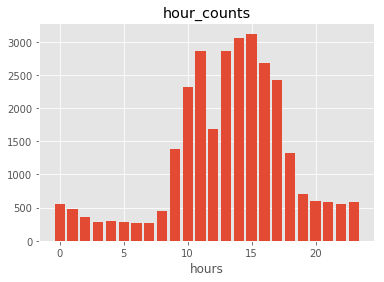

In [61]:
out = pd.cut(data['i_Time'], bins = range(0,25))
hour_counts = pd.value_counts(out,sort=False)
print hour_counts.index.values
#counts.plot('bar')
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(range(0,24),hour_counts)
ax.set_title('hour_counts')
ax.set_xlabel('hours')
#ax.xaxis.set_minor_locator(months)
#ax.autoscale_view()
#ax.set_xticklabels(hour_counts.index.values)
#fig.autofmt_xdate()
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/hour_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

In [21]:
weekday_time = []
for i in range(7):
    day = data[data['weekday'] == i]
    day_time = day['time_co'].sum()
    weekday_time.append(day_time)
print weekday_time

[576.69916666654535, 707.85527777769778, 739.43155555559849, 714.87997222225374, 755.99880555544519, 275.71874999994151, 285.48105555555912]


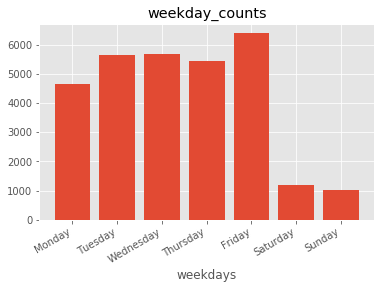

In [100]:
monday = data[data['weekday'] == 0]

weekday_counts = data['weekday'].value_counts(sort=False)
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(weekday_counts.index,weekday_counts)
#ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
ax.set_xticklabels(["Monday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig.autofmt_xdate()
ax.set_title('weekday_counts')
ax.set_xlabel('weekdays')
#ax2 = fig.add_subplot(222)
#ax2.pie(weekday_counts)
#ax2.set_aspect('equal')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/weekday_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

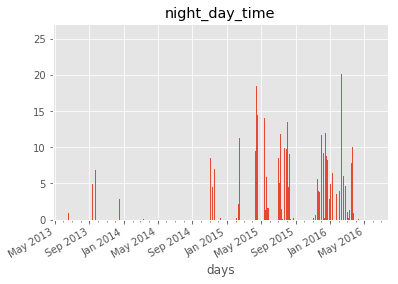

In [6]:
day_counts = night['time_co'].resample('D',how='sum')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
#day_counts.plot('bar')
#ax.bar(range(day_counts.shape[0]),day_counts)
ax.bar(day_counts.index,day_counts)
ax.xaxis.set_minor_locator(months)
#ax.set_ylim([0,450])
ax.set_xlabel('days')
#ax.autoscale_view()
fig.autofmt_xdate()
ax.set_title('night_day_time')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/night_day_time.png', dpi=500, bbox_inches='tight', pad_inches=0)

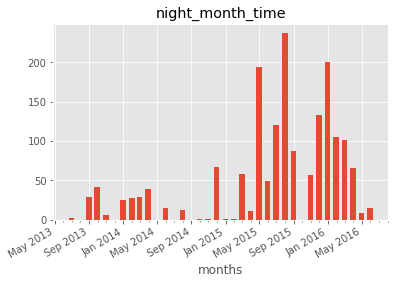

In [7]:
month_counts = night['time_co'].resample('M',how='sum')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
ax.bar(month_counts.index,month_counts, width=20)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
fig.autofmt_xdate()
ax.set_xlabel('months')
ax.set_title('night_month_time')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/night_month_time.png', dpi=500, bbox_inches='tight', pad_inches=0)

2013-01-01     556.667111
2014-01-01     693.176389
2015-01-01    2180.194972
2016-01-01     626.026111
Freq: AS-JAN, Name: time_co, dtype: float64


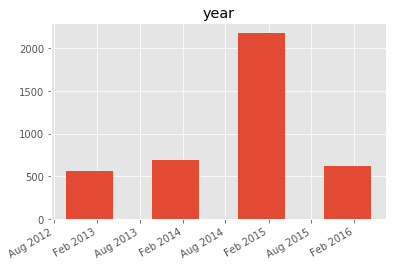

In [10]:
year_counts = data['time_co'].resample('AS',how='sum')
print year_counts
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(year_counts.index,year_counts,width=200)
#ax.xaxis.set_minor_locator(months)
#ax.autoscale_view()
fig.autofmt_xdate()
ax.set_title('year_time')
ax.set_title('year')
#hour_counts.plot('bar')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/night_year_time.png', dpi=500, bbox_inches='tight', pad_inches=0)

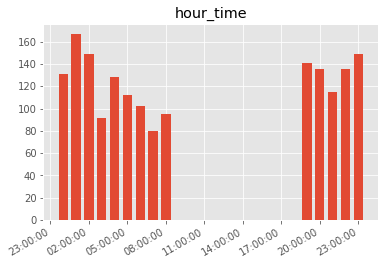

In [12]:
hour_counts = night['time_co'].resample('h',how='sum')
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(hour_counts.index,hour_counts,width=0.03)
#ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
fig.autofmt_xdate()
#ax.set_xlabel('months')
ax.set_title('hour_time')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/night_hour_time.png', dpi=500, bbox_inches='tight', pad_inches=0)

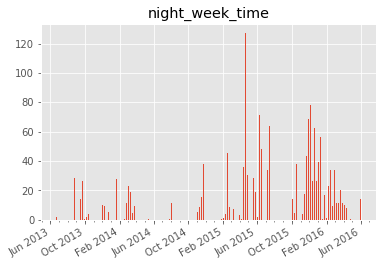

In [9]:
week_counts = night['time_co'].resample('W-MON',how='sum')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
ax.bar(week_counts.index,week_counts,width=3)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
#ax.set_xticklabels(["Monday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig.autofmt_xdate()
ax.set_title('night_week_time')
#ax.set_xlabel('weekdays')
#ax2 = fig.add_subplot(222)
#ax2.pie(weekday_counts)
#ax2.set_aspect('equal')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/night_week_time.png', dpi=500, bbox_inches='tight', pad_inches=0)